# Load imdb Data Set

In [3]:
install.packages('keras')
library(keras)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rappdirs’, ‘config’, ‘reticulate’, ‘tensorflow’, ‘tfruns’, ‘zeallot’




In [4]:
imdb <- dataset_imdb(num_words = 10000) # train set에서 출현빈도 기준 상위 10000개 단어

In [6]:
c(c(train_data, train_labels), c(test_data,test_labels)) %<-% imdb

In [7]:
str(train_data[[1]])

 int [1:218] 1 14 22 16 43 530 973 1622 1385 65 ...


In [8]:
train_labels[1] # 긍정 

[1] 1

In [9]:
max(sapply(train_data,max)) # 가장 많이 사용하는 10000개의 데이터 이므로 최대 index 9999

[1] 9999

In [10]:
word_index <- dataset_imdb_word_index()
head(word_index)

$fawn
[1] 34701

$tsukino
[1] 52006

$nunnery
[1] 52007

$sonja
[1] 16816

$vani
[1] 63951

$woods
[1] 1408

In [11]:
reverse_word_index <- names(word_index) # word index의 name
head(reverse_word_index)

[1] "fawn"    "tsukino" "nunnery" "sonja"   "vani"    "woods"

In [12]:
names(reverse_word_index) <- word_index # 자료구조 reversing
head(reverse_word_index)

34701     52006     52007     16816     63951      1408 
   "fawn" "tsukino" "nunnery"   "sonja"    "vani"   "woods"

In [13]:
decoded_review <- sapply(train_data[[1]],function(index) {
  word <- if (index >= 3) reverse_word_index[[as.character(index - 3)]]
  if (!is.null(word)) word 
  else "?"

})

In [14]:
head(decoded_review,10)

[1] "?"         "this"      "film"      "was"       "just"      "brilliant"
 [7] "casting"   "location"  "scenery"   "story"

In [15]:
# 정수 시퀀스 이진화 행렬로 부호화
vectorize_sequences <- function(sequences, dimension = 10000) {
  results <- matrix(0, nrow=length(sequences), ncol = dimension) # length(train_data) : 25000  >>> 25000*10000 행렬
  for (i in 1:length(sequences))
    results[i,sequences[[i]]] <- 1
  results
}

x_train <- vectorize_sequences(train_data)
x_test <- vectorize_sequences(test_data)

In [16]:
head(x_train)
head(x_test)
length(train_data)
length(x_test)

1,1,0,1,1,1,1,1,1,0,⋯,0,0,0,0,0,0,0,0,0,0
1,1,0,1,1,1,1,1,1,0,⋯,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,1,1,1,1,0,⋯,0,0,0,0,0,0,0,0,0,0
1,1,0,1,1,1,1,1,1,1,⋯,0,0,0,0,0,0,0,0,0,0
1,1,0,1,1,1,1,1,0,1,⋯,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,1,0,1,⋯,0,0,0,0,0,0,0,0,0,0


1,1,0,1,1,1,1,1,1,1,⋯,0,0,0,0,0,0,0,0,0,0
1,1,0,1,1,1,1,1,1,1,⋯,0,0,0,0,0,0,0,0,0,0
1,1,0,1,1,1,1,1,1,1,⋯,0,0,0,0,0,0,0,0,0,0
1,1,0,1,1,1,1,1,1,0,⋯,0,0,0,0,0,0,0,0,0,0
1,1,0,1,1,1,0,1,1,1,⋯,0,0,0,0,0,0,0,0,0,0
1,1,0,1,1,1,0,1,1,0,⋯,0,0,0,0,0,0,0,0,0,0


[1] 25000

[1] 250000000

In [17]:
head(train_data[1])

[[1]]
  [1]    1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941    4
 [16]  173   36  256    5   25  100   43  838  112   50  670    2    9   35  480
 [31]  284    5  150    4  172  112  167    2  336  385   39    4  172 4536 1111
 [46]   17  546   38   13  447    4  192   50   16    6  147 2025   19   14   22
 [61]    4 1920 4613  469    4   22   71   87   12   16   43  530   38   76   15
 [76]   13 1247    4   22   17  515   17   12   16  626   18    2    5   62  386
 [91]   12    8  316    8  106    5    4 2223 5244   16  480   66 3785   33    4
[106]  130   12   16   38  619    5   25  124   51   36  135   48   25 1415   33
[121]    6   22   12  215   28   77   52    5   14  407   16   82    2    8    4
[136]  107  117 5952   15  256    4    2    7 3766    5  723   36   71   43  530
[151]  476   26  400  317   46    7    4    2 1029   13  104   88    4  381   15
[166]  297   98   32 2071   56   26  141    6  194 7486   18    4  226   22   21
[181]  134  476   26  480    5  144   30 5535   18   51   36   28  224   92   25
[196]  104    4  226   65   16   38 1334   88   12   16  283    5   16 4472  113
[211]  103   32   15   16 5345   19  178   32

In [18]:
# label 정수 >> 숫자
y_train <- as.numeric(train_labels)
y_test <- as.numeric(test_labels)

# 망 구축

In [19]:
model <- keras_model_sequential() %>%
  layer_dense(units = 16, activation = 'relu', input_shape= c(10000)) %>%
  layer_dense(units = 16, activation = 'relu') %>%
  layer_dense(units = 1, activation = 'sigmoid')

In [20]:
model

Model
Model: "sequential"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense_2 (Dense)                     (None, 16)                      160016      
________________________________________________________________________________
dense_1 (Dense)                     (None, 16)                      272         
________________________________________________________________________________
dense (Dense)                       (None, 1)                       17          
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
________________________________________________________________________________



In [21]:
model %>% compile(
  optimizer ='rmsprop',
  loss = 'binary_crossentropy',
  metrics = c('accuracy')
)

In [24]:
# 검증 set
val_indices <- 1:10000
x_val <- x_train[val_indices,]
partial_x_train <- x_train[-val_indices,]
y_val <- y_train[val_indices]
partial_y_train <- y_train[-val_indices]

In [25]:
history <- model %>% fit(
  partial_x_train,
  partial_y_train,
  epochs = 20,
  batch_size = 512,
  validation_data = list(x_val, y_val)
)

In [26]:
str(history)

List of 2
 $ params :List of 3
  ..$ verbose: int 1
  ..$ epochs : int 20
  ..$ steps  : int 30
 $ metrics:List of 4
  ..$ loss        : num [1:20] 0.504 0.301 0.221 0.177 0.145 ...
  ..$ accuracy    : num [1:20] 0.787 0.9 0.927 0.944 0.954 ...
  ..$ val_loss    : num [1:20] 0.373 0.307 0.279 0.315 0.28 ...
  ..$ val_accuracy: num [1:20] 0.874 0.887 0.891 0.872 0.888 ...
 - attr(*, "class")= chr "keras_training_history"


`geom_smooth()` using formula 'y ~ x'



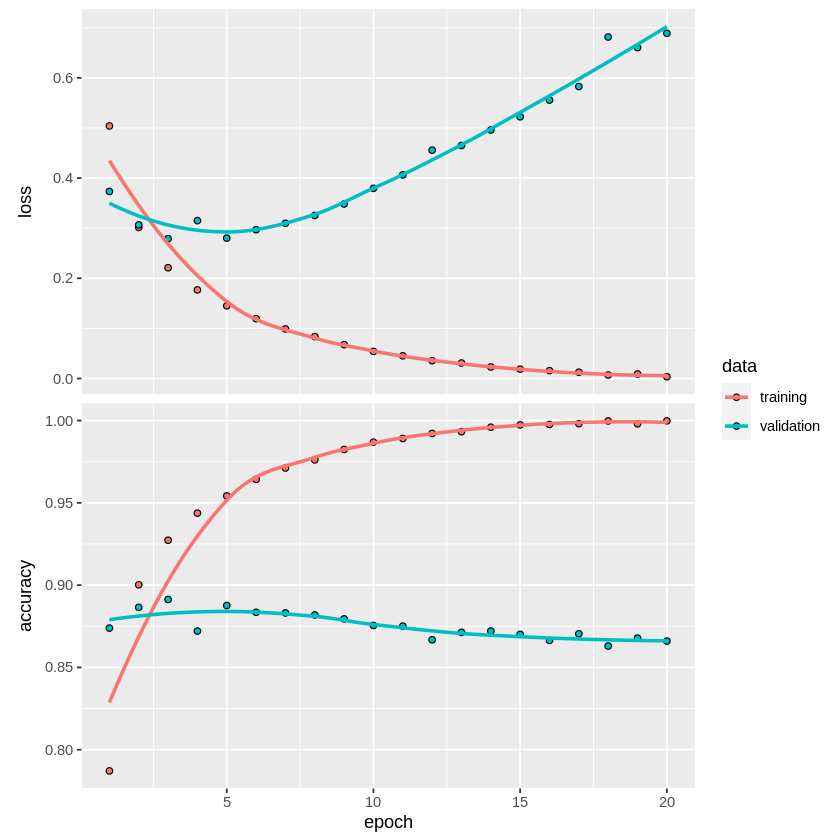

In [27]:
plot(history)

ERROR: ignored